In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
csv_path  = os.path.join("AlcSales_Project1.csv")
csv_path2 = os.path.join("Police_csv.csv")

police_data = pd.read_csv(csv_path2)
alcohol_data = pd.read_csv(csv_path)

police_df = pd.DataFrame(police_data)
alc_df = pd.DataFrame(alcohol_data)
police_df.head()

,Unnamed: 0,Unsafespeedcrashes/2020,Improperturningcrashes/2020,DUIcrashes/2020,Othercrashes/2020,Unsafespeedcrashes/2019,Improperturningcrashes/2019,DUIcrashes/2019,Othercrashes/2019
0,Entire Period,"19,029","10,292","4,942","10,947","33,072","10,906","5,589","15,132"
1,2/3/20,521,171,102,253,708,215,114,277
2,2/10/20,535,193,120,303,713,214,82,260
3,2/17/20,563,184,100,250,548,169,88,258
4,2/24/20,624,186,98,292,674,220,105,272


In [4]:
alc_df.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017.0,1,2.0,1.0,103645.0,42598.0,593378.0,0.0718,NaN,NaN
1,2017.0,1,5.0,1.0,402885.0,165586.0,2455022.0,0.0674,NaN,NaN
2,2017.0,1,8.0,1.0,733857.0,301615.0,4634346.0,0.0651,NaN,NaN
3,2017.0,1,9.0,1.0,412100.0,169373.0,3015481.0,0.0562,NaN,NaN
4,2017.0,1,10.0,1.0,180388.0,74139.0,799550.0,0.0927,NaN,NaN


In [5]:
state_df = alc_df
state_df['FIPS'].replace({2 :"Alaska", 
                          5: "Arkansas",
                          8: "Colorado",
                          9: "Connecticut", 
                          10: "Deleware", 
                          12 : "Florida", 
                          17 : "Illinois", 
                          20 : "Kansas", 
                          21 : "Kentucky", 
                          22 : "Louisiana", 
                          25 : "Massachusetts", 
                          29 : "Missouri", 
                          38 : "North Dakota", 
                          41 : "Oregon",
                          47 : "Tennessee", 
                          48 : "Texas", 
                          49 : "Utah",
                          51 : "Virginia", 
                          55 : "Wisconsin"
                    
                          
                         }, inplace=True)
state_df.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017.0,1,Alaska,1.0,103645.0,42598.0,593378.0,0.0718,NaN,NaN
1,2017.0,1,Arkansas,1.0,402885.0,165586.0,2455022.0,0.0674,NaN,NaN
2,2017.0,1,Colorado,1.0,733857.0,301615.0,4634346.0,0.0651,NaN,NaN
3,2017.0,1,Connecticut,1.0,412100.0,169373.0,3015481.0,0.0562,NaN,NaN
4,2017.0,1,Deleware,1.0,180388.0,74139.0,799550.0,0.0927,NaN,NaN


##### 

In [6]:
#changing beverage number to corresponding beverage 

beverage_df = state_df

beverage_df['Beverage'].replace({ 1: "Spirits", 
                                   2 : "Wine", 
                                3: "Beer"}, inplace=True)

beverage_df.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017.0,1,Alaska,Spirits,103645.0,42598.0,593378.0,0.0718,NaN,NaN
1,2017.0,1,Arkansas,Spirits,402885.0,165586.0,2455022.0,0.0674,NaN,NaN
2,2017.0,1,Colorado,Spirits,733857.0,301615.0,4634346.0,0.0651,NaN,NaN
3,2017.0,1,Connecticut,Spirits,412100.0,169373.0,3015481.0,0.0562,NaN,NaN
4,2017.0,1,Deleware,Spirits,180388.0,74139.0,799550.0,0.0927,NaN,NaN


In [7]:
#Summary statistics table on total Gallons of alcohol per State over a 3 year period 

#gallons_table2 = state_df.groupby(["FIPS"]).agg({"Gallons" : ['mean', 'median', 'var', 'std', 'sem']})


fips1 = state_df.groupby(["FIPS"]).mean()["Gallons"]
fips2 = state_df.groupby(["FIPS"]).median()["Gallons"]
fips3 = state_df.groupby(["FIPS"]).var()["Gallons"]
fips4 = state_df.groupby(["FIPS"]).std()["Gallons"]
fips5 = state_df.groupby(["FIPS"]).sem()["Gallons"]
fips6 = state_df.groupby(["FIPS"]).sum()["Gallons"]

gallons_table = pd.DataFrame({"Mean": fips1.map("{:,.2f}".format), "Median": fips2.map("{:,.2f}".format), "Variance": fips3.map("{:,.2f}".format),
              "STD": fips4.map("{:,.2f}".format), "SEM": fips5.map("{:,.2f}".format), "Sum": fips6.map("{:,.2f}".format)})
gallons_table

,Mean,Median,Variance,STD,SEM,Sum
FIPS,,,,,,
Alaska,"506,061.90","199,086.00","246,150,691,223.82","496,135.76","42,700.57","68,318,357.00"
Arkansas,"1,608,594.65","405,821.00","3,250,165,641,053.30","1,802,821.58","155,162.18","217,160,278.00"
Colorado,"4,263,836.53","1,538,100.00","17,963,215,861,954.21","4,238,303.42","368,896.96","562,826,422.00"
Connecticut,"2,098,080.86","1,149,992.00","3,144,859,486,036.56","1,773,375.17","156,136.98","270,652,431.00"
Deleware,"788,766.40","397,040.00","473,674,876,344.36","688,240.42","59,903.64","104,117,165.00"
Florida,"15,203,955.04","6,365,895.00","206,017,952,006,814.03","14,353,325.47","1,235,337.57","2,052,533,930.00"
Illinois,"8,651,783.78","3,094,234.00","81,871,880,603,169.06","9,048,308.16","778,754.37","1,167,990,810.00"
Kansas,"2,450,370.04","1,881,432.50","4,521,090,812,830.45","2,126,285.68","224,130.19","220,533,304.00"
Kentucky,"2,480,112.68","681,101.00","7,642,839,136,856.73","2,764,568.53","237,936.17","334,815,212.00"


In [57]:
#want to generate a bar chart showing the gallons of consumption per state, by month 

#need to split beverages by type 
spirits = beverage_df.loc[(beverage_df["Beverage"] == "Spirits"),:]
wine = beverage_df.loc[(beverage_df["Beverage"] == "Wine"),:]
beer = beverage_df.loc[(beverage_df["Beverage"] == "Beer"),:]

index = spirits_df['FIPS']
print(len(index))

spirits_df = spirits[["Year", "FIPS", "Beverage", "Gallons" ]]
wine_df = wine[["Year", "FIPS", "Beverage", "Gallons"]]
beer_df = beer[["Year", "FIPS", "Beverage", "Gallons"]]
               
               
spirit_gal_sums = []
for state in spirits['FIPS']:
    spirit_gal_sums.append(spirits_df.loc[spirits_df['FIPS'] == state]['Gallons'].sum())

print(len(beer_gal_sums))

wine_gal_sums = []
for state in wine['FIPS']:
    wine_gal_sums.append(wine_df.loc[wine_df['FIPS'] == state]['Gallons'].sum())

beer_gal_sums = []
for state in beer['FIPS']:
    beer_gal_sums.append(beer_df.loc[beer_df['FIPS'] == state]['Gallons'].sum())

NameError: name 'spirits_df' is not defined

In [9]:
alc_df["FIPS"]

0             Alaska
1           Arkansas
2           Colorado
3        Connecticut
4           Deleware
            ...     
2301        Missouri
2302    North Dakota
2303          Oregon
2304       Tennessee
2305             NaN
Name: FIPS, Length: 2306, dtype: object

In [43]:
texas = alc_df.loc[(alc_df["FIPS"] == "Texas"),:]

texas_17 = texas.loc[(texas["Year"] == 2017),:]
texas_18 = texas.loc[(texas["Year"] == 2018),:]
texas_19 = texas.loc[(texas["Year"] == 2019),:]
texas_20 = texas.loc[(texas["Year"] == 2020),:]

#2017 gallons of spirits for texas 
texas_17_spirits = texas_17.loc[(texas_17["Beverage"] == "Spirits"),:]
gallons_17 = texas_17_spirits["Gallons"]
month_17 = texas_17_spirits["Month"]

In [42]:
#2017 gallons of wine for texas 
texas_17_wine = texas_17.loc[(texas_17["Beverage"] == "Wine"),:]
gallons1_17 = texas_17_wine["Gallons"]
month1_17 = texas_17_wine["Month"]


In [41]:
#2017 gallons of beer for texas 
texas_17_beer = texas_17.loc[(texas_17["Beverage"] == "Beer"),:]
gallons2_17 = texas_17_beer["Gallons"]
month2_17 = texas_17_beer["Month"]


In [40]:
#2018 gallons of spirits for texas 
texas_18_spirits = texas_18.loc[(texas_18["Beverage"] == "Spirits"),:]
gallons_18 = texas_18_spirits["Gallons"]
month_18 = texas_18_spirits["Month"]


In [39]:
#2018 gallons of wine for texas 
texas_18_wine = texas_18.loc[(texas_18["Beverage"] == "Wine"),:]
gallons1_18 = texas_18_wine["Gallons"]
month1_18 = texas_18_wine["Month"]

In [38]:
#2018 gallons of beer for texas 
texas_18_beer = texas_18.loc[(texas_18["Beverage"] == "Beer"),:]
gallons2_18 = texas_18_beer["Gallons"]
month2_18 = texas_18_beer["Month"]

In [37]:
#2019 spirits for texas 
texas_19_spirits = texas_19.loc[(texas_19["Beverage"] == "Spirits"),:]
gallons_19 = texas_19_spirits["Gallons"]
month_19 = texas_19_spirits["Month"]


In [36]:
#2019 gallons of wine for texas 
texas_19_wine = texas_19.loc[(texas_19["Beverage"] == "Wine"),:]
gallons1_19 = texas_19_wine["Gallons"]
month1_19 = texas_19_wine["Month"]


In [35]:
#2019 gallons of beer for texas 
texas_19_beer = texas_19.loc[(texas_19["Beverage"] == "Beer"),:]
gallons2_19 = texas_19_beer["Gallons"]
month2_19 = texas_19_beer["Month"]


In [34]:
#2020 spirits for texas 
texas_20_spirits = texas_20.loc[(texas_20["Beverage"] == "Spirits"),:]
gallons_20 = texas_20_spirits["Gallons"]
month_20 = texas_20_spirits["Month"]


In [33]:
#2020 gallons of wine for texas 
texas_20_wine = texas_20.loc[(texas_20["Beverage"] == "Wine"),:]
gallons1_20 = texas_20_wine["Gallons"]
month1_20 = texas_20_wine["Month"]


In [44]:
#2020 gallons of beer for texas 
texas_20_beer = texas_20.loc[(texas_20["Beverage"] == "Beer"),:]
gallons2_20 = texas_20_beer["Gallons"]
month2_20 = texas_20_beer["Month"]

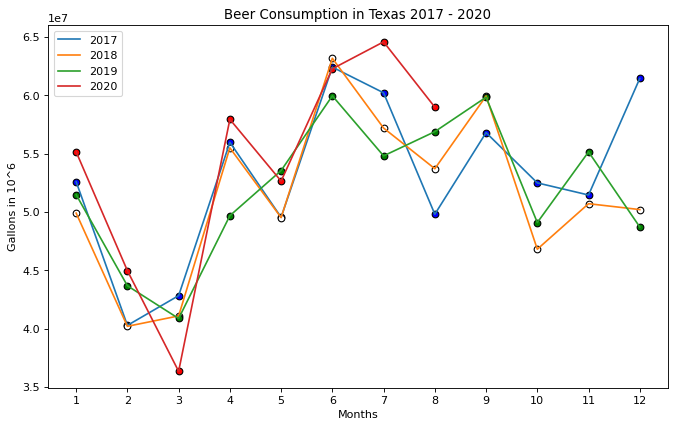

In [27]:
# # # # BEER CONSUMPTION FOR TEXAS 2017 - 2020  # # # # 
figure(num=None, figsize=(10, 6), dpi=80)
plt.scatter(month2_17,gallons2_17, facecolors="blue", edgecolors="black" )
plt.scatter(month2_18,gallons2_18, facecolors="white", edgecolors="black" )
plt.scatter(month2_19,gallons2_19, facecolors="green", edgecolors="black" )
plt.scatter(month2_20,gallons2_20, facecolors="red", edgecolors="black" )
plt.plot(month2_17,gallons2_17, label = "2017")
plt.plot(month2_18,gallons2_18, label = "2018")
plt.plot(month2_19,gallons2_19, label = "2019")
plt.plot(month2_20,gallons2_20, label = "2020")
plt.xticks(month2_17)
plt.title("Beer Consumption in Texas 2017 - 2020")
plt.xlabel("Months")
plt.ylabel("Gallons in 10^6")
plt.legend(loc="best")
plt.show()

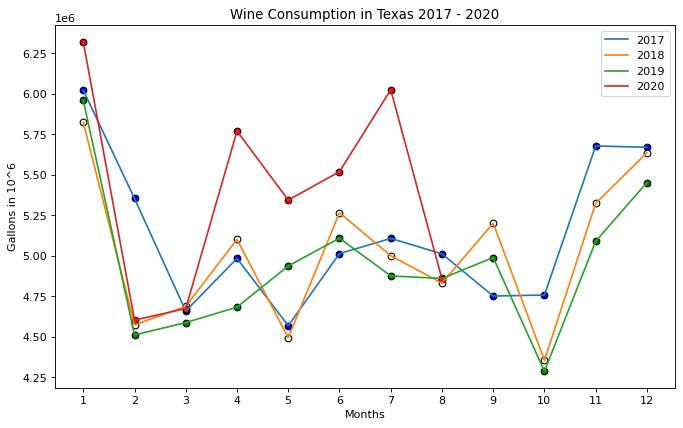

In [23]:
# # # # # # WINE COMSUMPTION FOR TEXAS 2017 - 2020 # # # # # # # 

figure(num=None, figsize=(10, 6), dpi=80)
plt.scatter(month1_17,gallons1_17, facecolors="blue", edgecolors="black" )
plt.scatter(month1_18,gallons1_18, facecolors="white", edgecolors="black" )
plt.scatter(month1_19,gallons1_19, facecolors="green", edgecolors="black" )
plt.scatter(month1_20,gallons1_20, facecolors="red", edgecolors="black" )
plt.plot(month1_17,gallons1_17, label = "2017")
plt.plot(month1_18,gallons1_18, label = "2018")
plt.plot(month1_19,gallons1_19, label = "2019")
plt.plot(month1_20,gallons1_20, label = "2020")
plt.xticks(month2_17)
plt.title("Wine Consumption in Texas 2017 - 2020")
plt.xlabel("Months")
plt.ylabel("Gallons in 10^6")
plt.legend(loc="best")
plt.show()

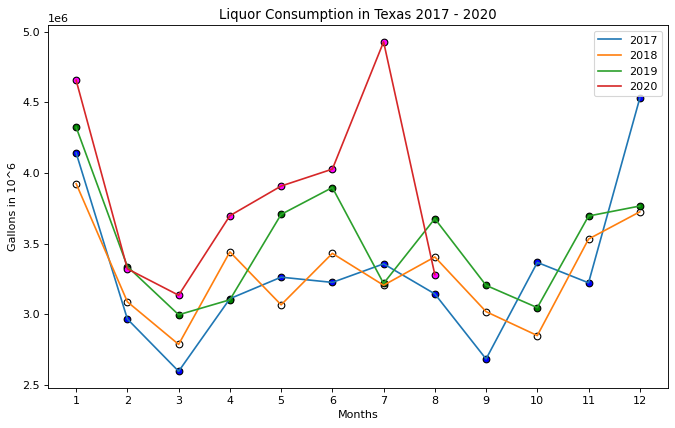

In [25]:
# # # # # LIQUOR CONSUMPTION FOR TEXAS 2017 - 2020 # # # # # # 

figure(num=None, figsize=(10, 6), dpi=80)
plt.scatter(month_17,gallons_17, facecolors="blue", edgecolors="black" )
plt.scatter(month_18,gallons_18, facecolors="white", edgecolors="black" )
plt.scatter(month_19,gallons_19, facecolors="green", edgecolors="black" )
plt.scatter(month_20,gallons_20, facecolors="magenta", edgecolors="black" )
plt.plot(month_17,gallons_17, label = "2017")
plt.plot(month_18,gallons_18, label = "2018")
plt.plot(month_19,gallons_19, label = "2019")
plt.plot(month_20,gallons_20, label = "2020")
plt.xticks(month2_17)
plt.title("Liquor Consumption in Texas 2017 - 2020")
plt.xlabel("Months")
plt.ylabel("Gallons in 10^6")
plt.legend(loc="best")

plt.show()